In [1]:
####importing Required Packages####


import pandas as pd #For data processing

# For data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import datetime

In [2]:
data1 = pd.read_csv("C:\\Users\\lenovo\\Documents\\UMBC MASTERS\\601 - Intro to data science\\RollingSystemDemand_20210313_2115.csv")
data2 = pd.read_csv("C:\\Users\\lenovo\\Documents\\UMBC MASTERS\\601 - Intro to data science\\RollingSystemDemand_20210313_2106.csv")

In [3]:
data1.head() #checking data1

,HDR,ROLLING SYSTEM DEMAND
VD,20210101000000,28762.0
VD,20210101000500,28859.0
VD,20210101001000,28962.0
VD,20210101001500,28992.0
VD,20210101002000,28898.0


In [4]:
data2.head() #checking data2

,HDR,ROLLING SYSTEM DEMAND
VD,20210106000000,30965.0
VD,20210106000500,31344.0
VD,20210106001000,31343.0
VD,20210106001500,31354.0
VD,20210106002000,31298.0


In [5]:
data1.shape

(1441, 2)

In [6]:
data2.shape

(1729, 2)

In [7]:
final_data = pd.concat([data1,data2]) #merging data

In [8]:
final_data.shape 

(3170, 2)

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3170 entries, VD to FTR
Data columns (total 2 columns):
HDR                      3170 non-null int64
ROLLING SYSTEM DEMAND    3168 non-null float64
dtypes: float64(1), int64(1)
memory usage: 74.3+ KB


In [10]:
final_data.isnull().sum() #Number of NA values


HDR                      0
ROLLING SYSTEM DEMAND    2
dtype: int64

In [11]:
final_data=final_data.dropna()

In [12]:
final_data.shape 

(3168, 2)

In [13]:
final_data['Date'] = pd.to_datetime(final_data['HDR'], format='%Y%m%d%H%M%S')

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3168 entries, VD to VD
Data columns (total 3 columns):
HDR                      3168 non-null int64
ROLLING SYSTEM DEMAND    3168 non-null float64
Date                     3168 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 99.0+ KB


In [15]:
Visualisation = final_data.groupby(final_data.Date.dt.hour).mean()

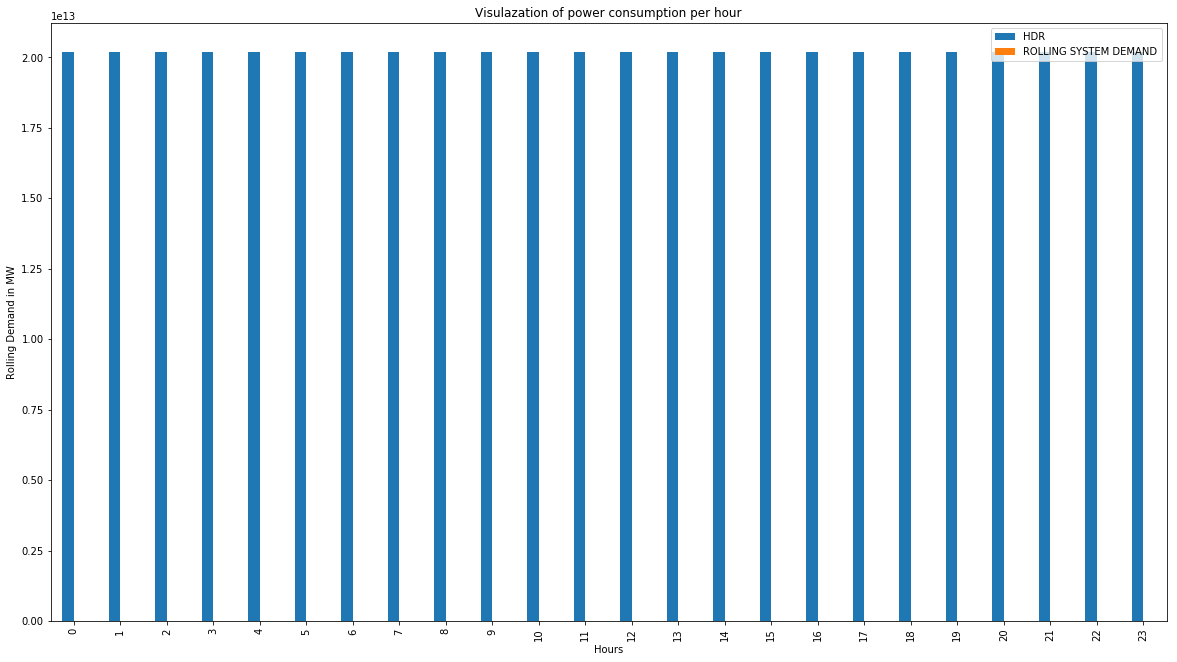

In [18]:
#Power consumption per hour
Visualisation.plot.bar()
plt.xlabel('Hours')
plt.ylabel('Rolling Demand in MW')
plt.title('Visulazation of power consumption per hour')
fig = plt.gcf()
fig.set_size_inches(20,11)
plt.show()

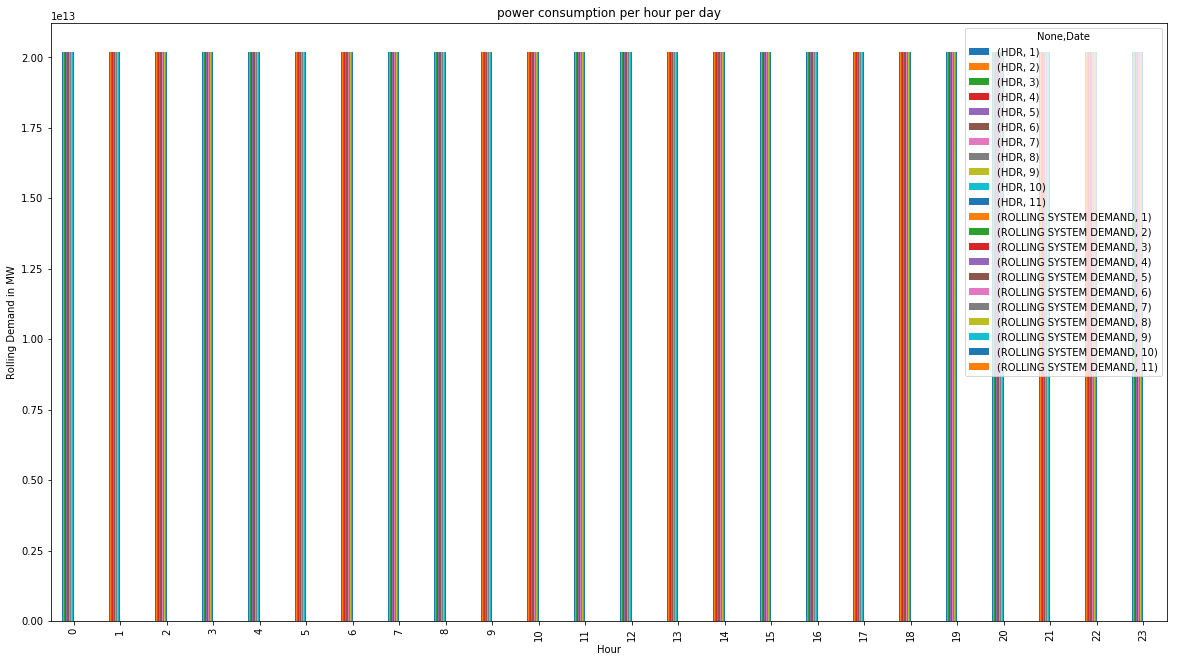

In [17]:
from matplotlib.pyplot import figure
data= final_data.groupby([final_data.Date.dt.hour, final_data.Date.dt.day]).mean().unstack()
data.plot.bar()
plt.xlabel('Hour')
plt.ylabel('Rolling Demand in MW')
plt.title('power consumption per hour per day')
fig = plt.gcf()
fig.set_size_inches(20,11)
plt.show()
